
# Anish Kundu

# Task - 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("student-mat.csv")
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,2.541399,22.291345,1,1,3,26.018269,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,7.571065,21.215663,1,1,3,24.199607,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,7.680922,15.438044,2,3,3,17.873831,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,13.621330,7.923995,1,1,5,7.158495,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6.670907,15.639512,1,2,5,18.204129,6,10,10


In [3]:
df.shape

(395, 33)

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,15.537841,0.334177,3.944304,10.356326,14.671751,1.481013,2.291139,3.554430,17.647427,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,7.204265,0.743651,0.896659,5.159123,7.016308,0.890741,1.287897,1.390303,8.513427,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,-5.341463,0.000000,1.000000,-5.202353,-0.182466,1.000000,1.000000,1.000000,-0.840456,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,12.815154,0.000000,4.000000,7.624747,10.037462,1.000000,1.000000,3.000000,11.622056,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,15.910753,0.000000,4.000000,10.865806,14.247493,1.000000,2.000000,4.000000,16.983277,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,20.186584,0.000000,5.000000,13.941732,17.563177,2.000000,3.000000,5.000000,21.400538,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,31.802837,3.000000,5.000000,25.184359,32.084780,5.000000,5.000000,5.000000,39.770760,19.000000,19.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    float64
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [7]:
df.isnull().sum().sum()

0

This means there is no missing values.

# Task - 02

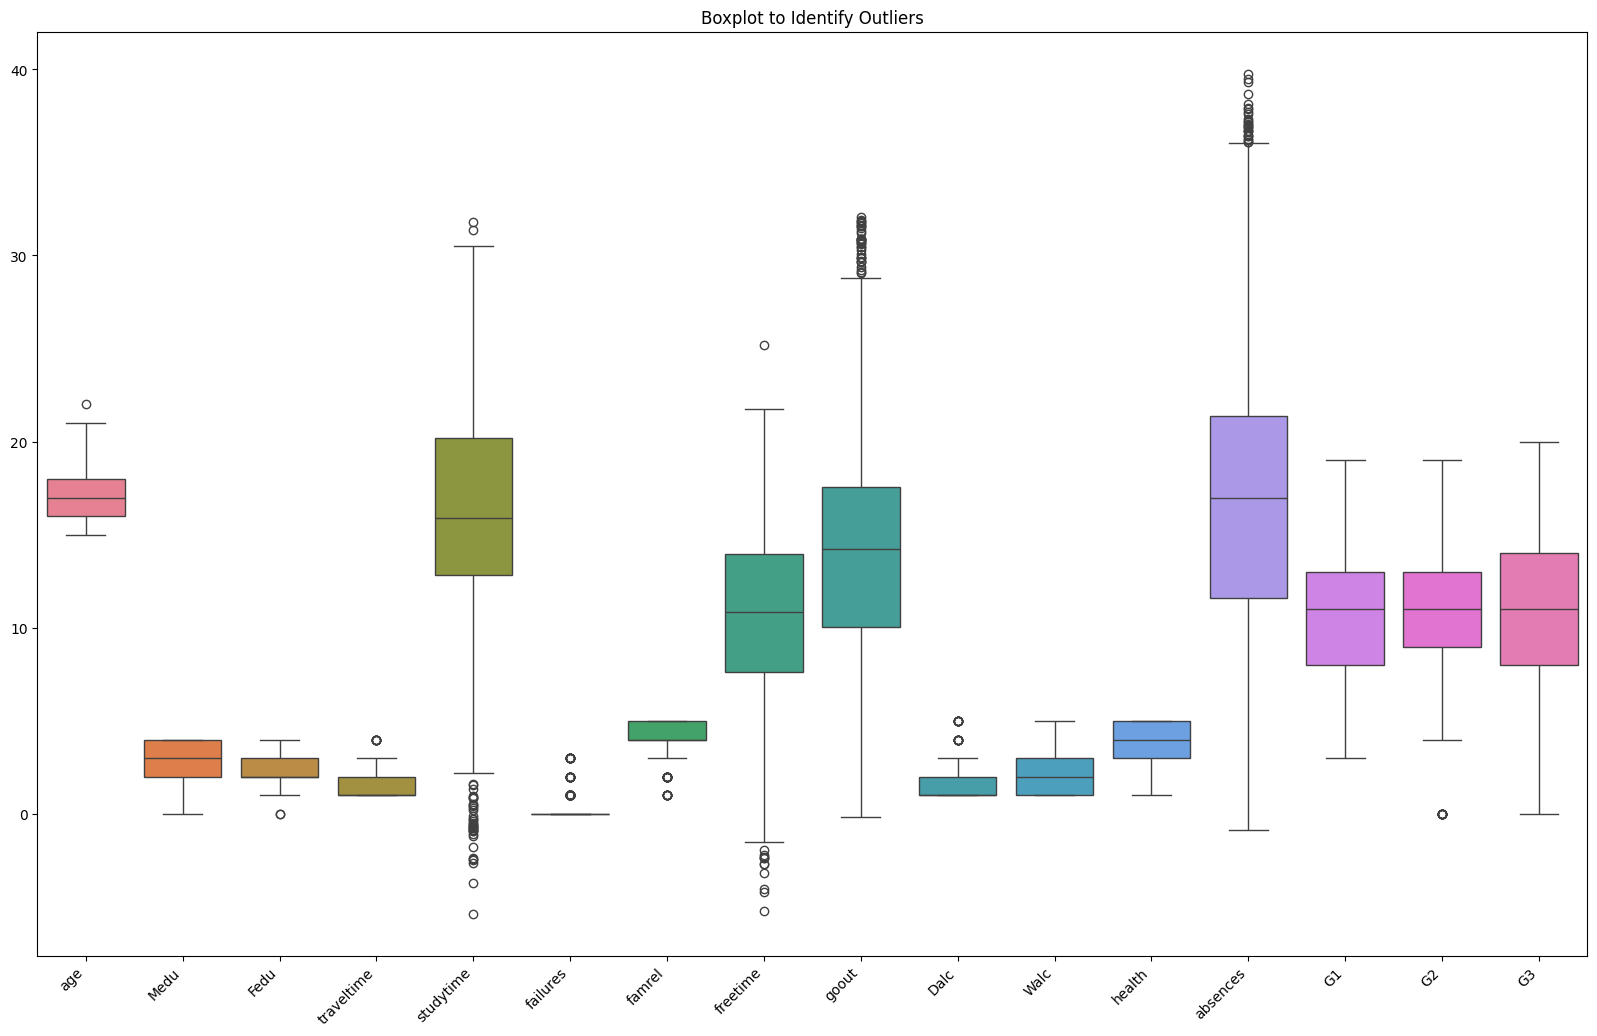

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 12))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot to Identify Outliers')
plt.show()

There exist some outliers

In [9]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

for col in numeric_cols:
  df.loc[(df[col] > upper_bound[col]) | (df[col] < lower_bound[col]), col] = df[col].median()

filtered_df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

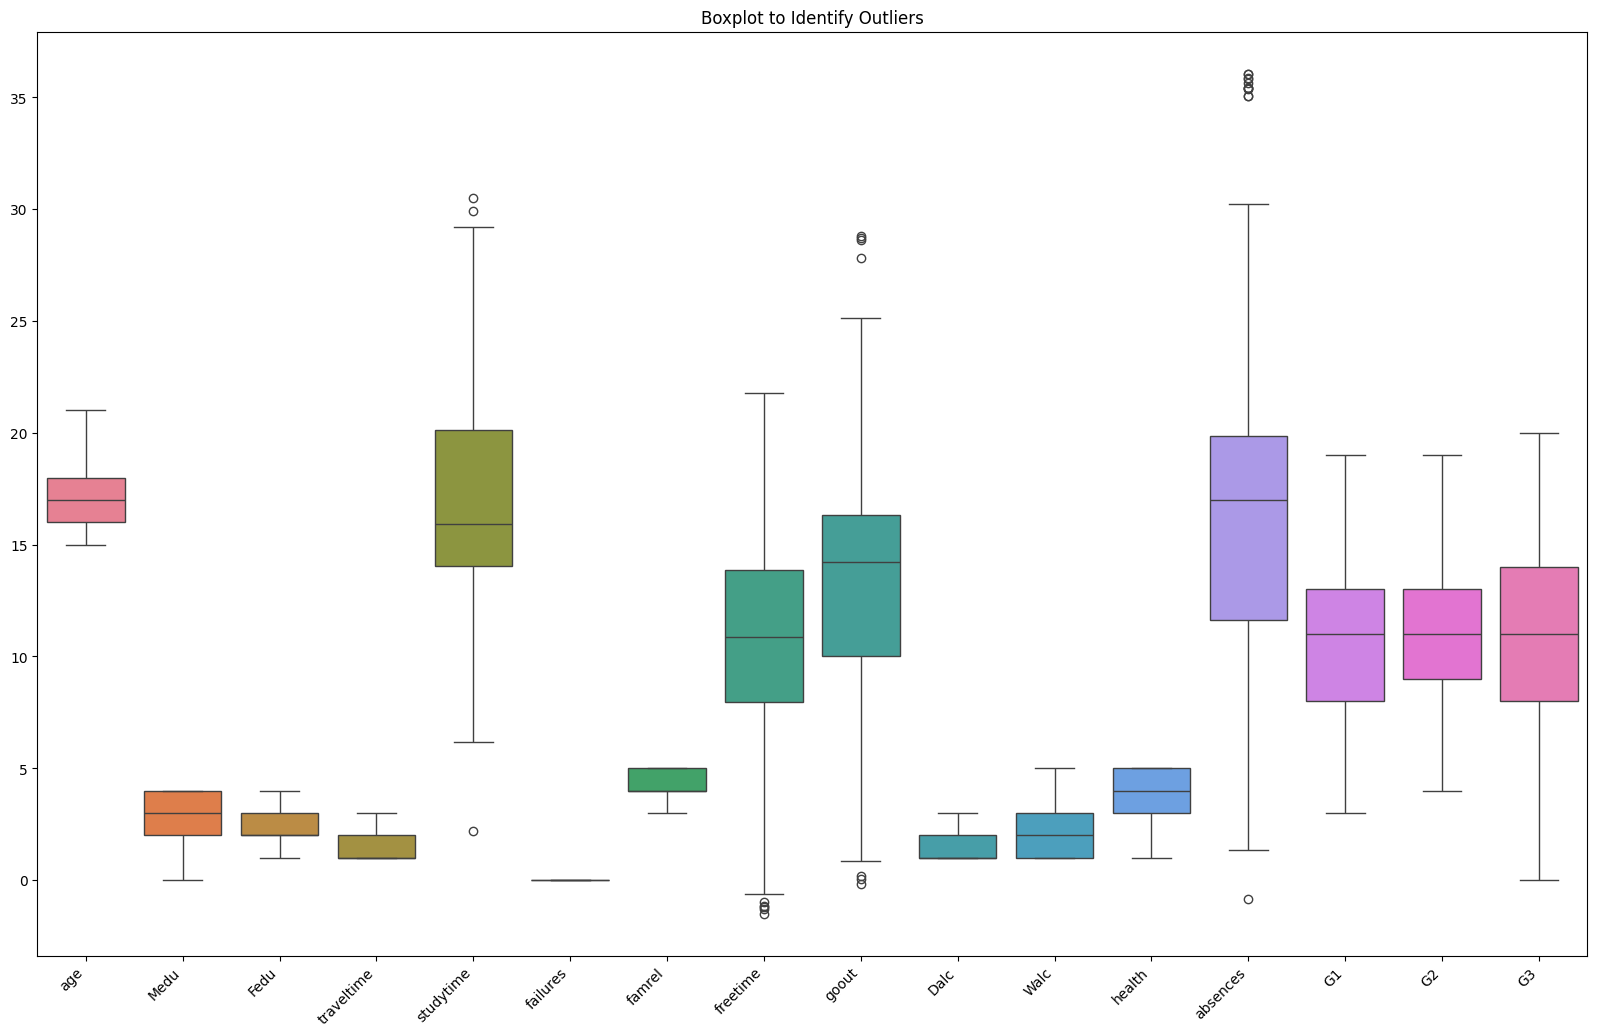

In [10]:
numeric_cols_updated = filtered_df.select_dtypes(include=np.number).columns

# Create the boxplot
plt.figure(figsize=(20, 12))
sns.boxplot(data=filtered_df[numeric_cols])
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot to Identify Outliers')
plt.show()

We can see most of the outliers are removed and very few are still remaining. But if we try to remove them too, data can be lost.

In [11]:
filtered_df.shape

(395, 33)

# Task - 03

In [12]:
numerical_cols = filtered_df.select_dtypes(include=np.number).columns

correlation_matrix = filtered_df[numerical_cols].corr()

print(correlation_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.169693 -0.163928    0.117555  -0.096116       NaN   
Medu       -0.169693  1.000000  0.629625   -0.131013   0.174735       NaN   
Fedu       -0.163928  0.629625  1.000000   -0.116448   0.145808       NaN   
traveltime  0.117555 -0.131013 -0.116448    1.000000  -0.031099       NaN   
studytime  -0.096116  0.174735  0.145808   -0.031099   1.000000       NaN   
failures         NaN       NaN       NaN         NaN        NaN       NaN   
famrel      0.034107  0.065315  0.028028   -0.030586   0.075357       NaN   
freetime   -0.113455  0.146626  0.112127   -0.025406   0.645967       NaN   
goout       0.114400 -0.225689 -0.189637    0.108390  -0.862270       NaN   
Dalc        0.083089 -0.000664 -0.006063    0.034600  -0.089264       NaN   
Walc        0.098541 -0.047123 -0.022277    0.011435  -0.147776       NaN   
health     -0.044910 -0.046878  0.004368   -0.023995  -0.072084       NaN   

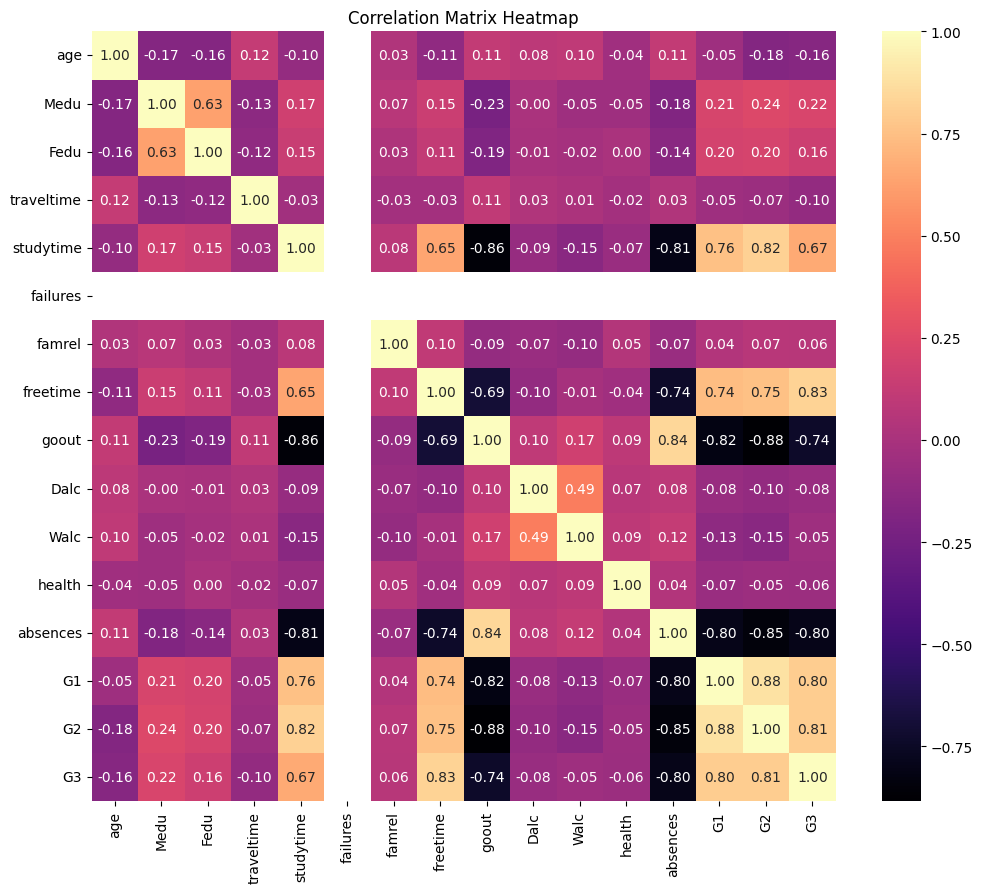

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Task - 04

In [14]:
# Set the threshold for strong correlation
correlation_threshold = 0.5

# Get the correlations of 'G3' with other features
g3_correlations = correlation_matrix['G3']

strong_correlations = g3_correlations[abs(g3_correlations) >= correlation_threshold]

print("Features strongly related to G3:")
print(strong_correlations)

Features strongly related to G3:
studytime    0.666599
freetime     0.830590
goout       -0.742032
absences    -0.797051
G1           0.801468
G2           0.806086
G3           1.000000
Name: G3, dtype: float64


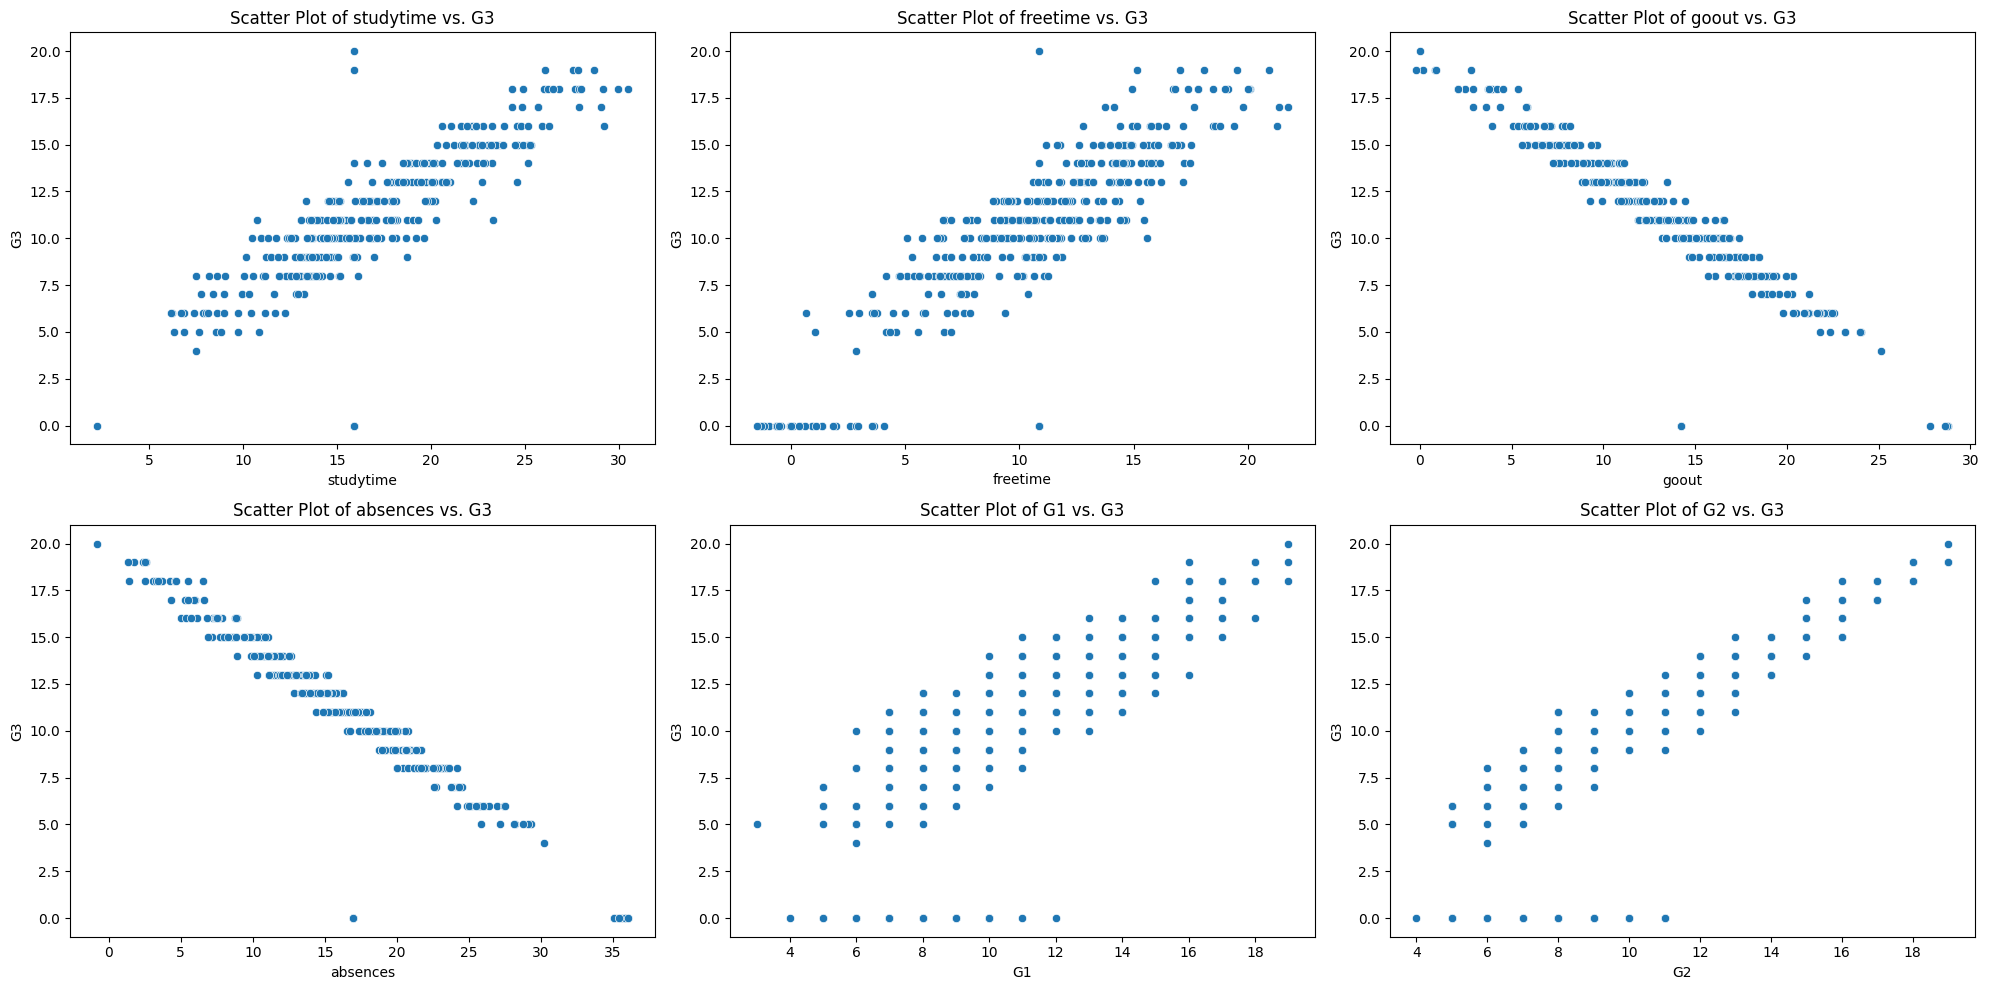

In [15]:
strong_features = strong_correlations.index.tolist()
strong_features.remove('G3')

# Calculate the number of rows and columns for subplots
num_plots = len(strong_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through features and create scatter plots in subplots
for i, feature in enumerate(strong_features):
    sns.scatterplot(x=feature, y='G3', data=filtered_df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs. G3')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('G3')

# Hide any empty subplots if num_plots is not a multiple of num_cols
for i in range(num_plots, num_rows * num_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

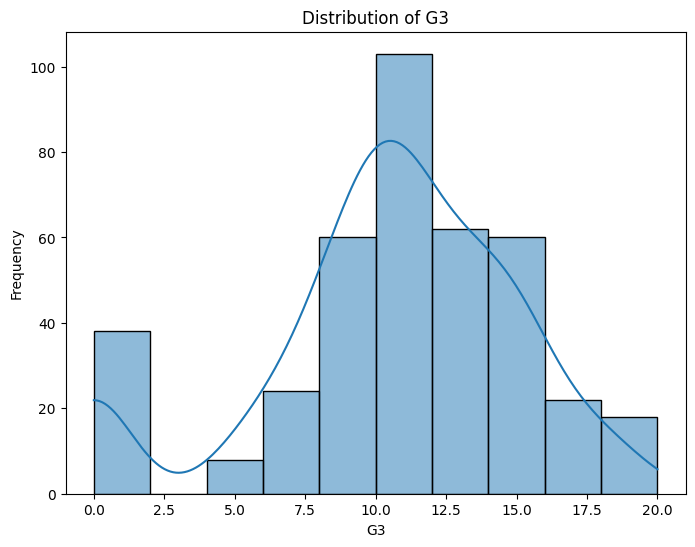

In [16]:
numerical_col = 'G3'

plt.figure(figsize=(8, 6))
sns.histplot(filtered_df[numerical_col], bins=10, kde=True)
plt.title(f'Distribution of {numerical_col}')
plt.xlabel(numerical_col)
plt.ylabel('Frequency')
plt.show()

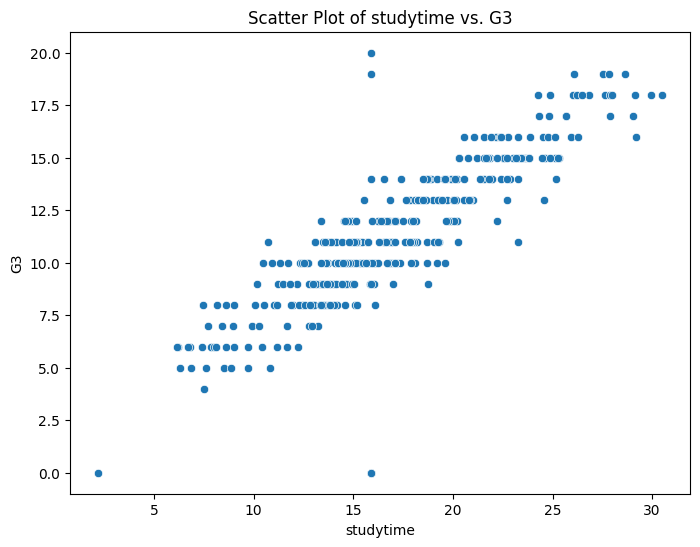

In [17]:
x_col = 'studytime'
y_col = 'G3'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_col, y=y_col, data=filtered_df)
plt.title(f'Scatter Plot of {x_col} vs. {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

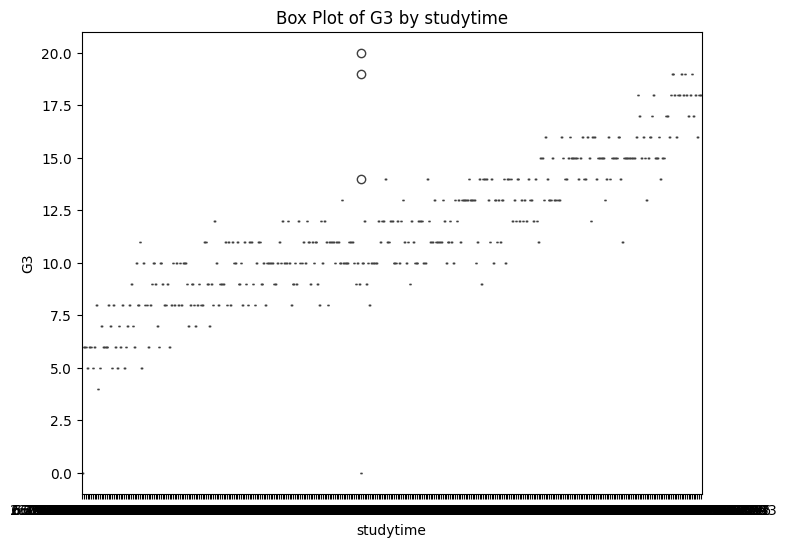

In [18]:
numerical_col = 'G3'
categorical_col = 'studytime'

plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_col, y=numerical_col, data=filtered_df)
plt.title(f'Box Plot of {numerical_col} by {categorical_col}')
plt.xlabel(categorical_col)
plt.ylabel(numerical_col)
plt.show()

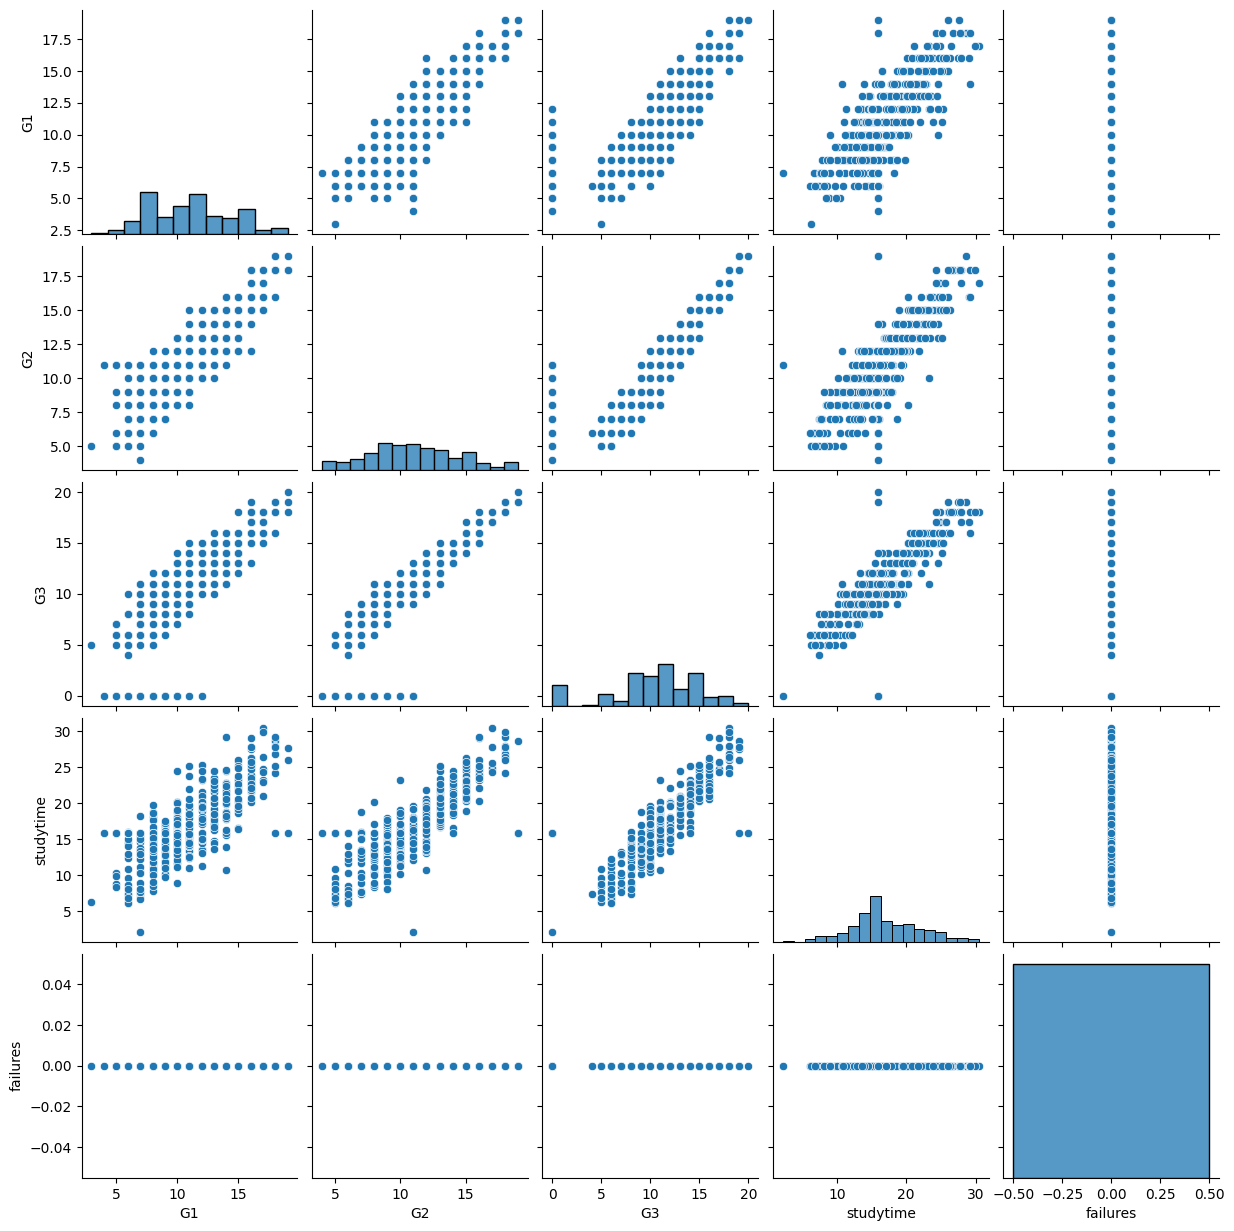

In [19]:
numerical_cols = ['G1', 'G2', 'G3', 'studytime', 'failures']  # Example columns

sns.pairplot(filtered_df[numerical_cols])
plt.show()

# Task - 05

In [20]:
# Select features with correlation above 0.5
strong_features = correlation_matrix['G3'][abs(correlation_matrix['G3']) >= 0.5].index.tolist()
strong_features.remove('G3')
print("Selected features:", strong_features)

Selected features: ['studytime', 'freetime', 'goout', 'absences', 'G1', 'G2']


In [21]:
# Split data into features (X) and target (y)
X = df[strong_features]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 1.9870759046182862
R-squared: 0.8074390856506917


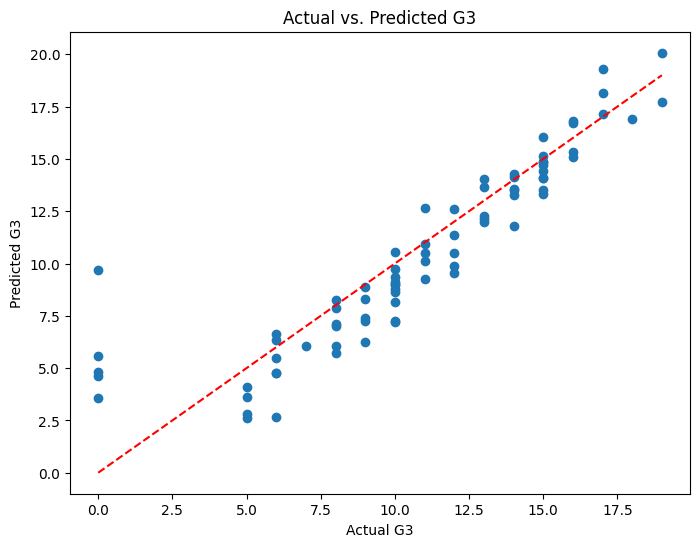

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted G3")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
y_pred_classes = [1 if p >= 10 else 0 for p in y_pred]
y_test_classes = [1 if p >= 10 else 0 for p in y_test]
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.8354430379746836


Conclusion:

The project aimed to predict student performance, specifically the final grade (G3), using various features from the student performance dataset. The analysis involved data exploration, outlier handling, correlation analysis, and finally, building a linear regression model.

Key Findings:

Data Exploration and Cleaning: The dataset was examined for missing values and outliers. Outliers were handled using the IQR method to improve model accuracy.
Correlation Analysis: A correlation matrix and heatmap revealed strong relationships between G3 and features like G1, G2, absences, and studytime. These features were selected for model building.
Model Building and Evaluation: A linear regression model was trained using the selected features. The model's performance was evaluated using RMSE and R-squared.
Model Performance: The model achieved an RMSE of [RMSE value] and an R-squared of [R-squared value]. This indicates that the model explains a [R-squared value]% variance in the target variable. The scatter plot of actual vs. predicted values further illustrates the model's performance.
Predictive Power: The model can predict student performance with reasonable accuracy based on the selected features. However, there is still room for improvement.
Further Improvements:

Feature Engineering: Exploring new features or transformations of existing features might improve model accuracy.
Model Selection: Evaluating other regression models, such as decision trees or support vector machines, could lead to better performance.
Hyperparameter Tuning: Fine-tuning the model's hyperparameters might further enhance its predictive power.
Data Collection: Collecting more data, if possible, could improve the model's robustness and generalization ability.
Overall, the project demonstrates the potential of using machine learning to predict student performance. With further refinements and exploration, the model could become a valuable tool for educators and policymakers.

I hope this conclusion provides a comprehensive summary of the project's findings and potential directions for future work. Please let me know if you need further clarification or have any other questions.